<a href="https://colab.research.google.com/github/sharonsreshta/Basic-ML/blob/main/Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
train = pd.read_csv("/content/fraudTrain.csv")
test = pd.read_csv("/content/fraudTest.csv")

data = pd.concat([train,test])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108929 entries, 0 to 38895
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             108929 non-null  int64  
 1   trans_date_trans_time  108929 non-null  object 
 2   cc_num                 108928 non-null  float64
 3   merchant               108928 non-null  object 
 4   category               108928 non-null  object 
 5   amt                    108928 non-null  float64
 6   first                  108928 non-null  object 
 7   last                   108928 non-null  object 
 8   gender                 108927 non-null  object 
 9   street                 108927 non-null  object 
 10  city                   108927 non-null  object 
 11  state                  108927 non-null  object 
 12  zip                    108927 non-null  float64
 13  lat                    108927 non-null  float64
 14  long                   108927 non-nul

In [ ]:
print(train.shape)
print(test.shape)

(70033, 23)
(38896, 23)


In [ ]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


          Unnamed: 0        cc_num            amt            zip  \
count  108929.000000  1.089280e+05  108928.000000  108927.000000   
mean    29456.852519  4.196202e+17      71.119677   48654.375031   
std     19064.097968  1.312012e+18     152.459754   26886.847954   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%     13616.000000  1.800429e+14       9.700000   26041.000000   
50%     27232.000000  3.519607e+15      47.570000   48088.000000   
75%     42800.000000  4.635331e+15      83.480000   72011.000000   
max     70032.000000  4.992346e+18   13149.150000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  108927.000000  108927.000000  1.089270e+05  1.089270e+05   
mean       38.537472     -90.151305  9.000286e+04  1.343303e+09   
std         5.072298      13.756672  3.031998e+05  2.167786e+07   
min        20.027100    -165.672300  2.300000e+01  1.325376e+09   
25%        34.668900     -96.786900  7.430000e+02  1

In [ ]:
label_encoder = {}

label_encoder_cols = ['merchant','category','gender','state','job']
for col in label_encoder_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoder[col] = le

  train[col] = le.fit_transform(train[col])
  label_encoder[col] = le

  test[col] = le.fit_transform(test[col])
  label_encoder[col] = le


<ipython-input-7-62d971e19d35>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix=data.corr()


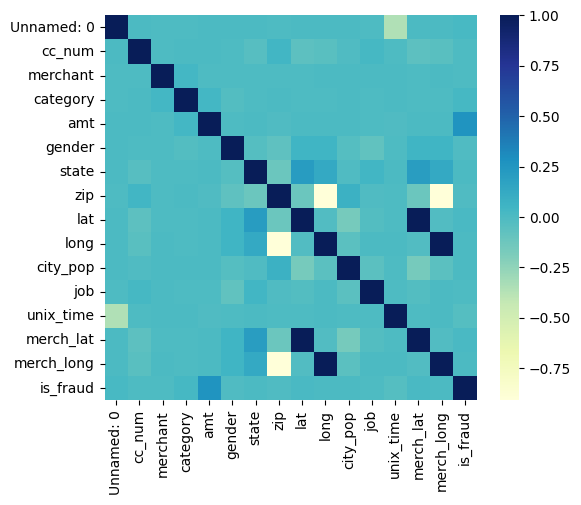

<Figure size 640x480 with 0 Axes>

In [ ]:
# correlation heatmap
corrMatrix=data.corr()
sns.heatmap(data=corrMatrix, annot=False , cmap="YlGnBu")
plt.gcf().set_size_inches(6, 5)
plt.figure()
plt.show()

In [ ]:
df_train = pd.read_csv("/content/fraudTrain.csv")
df_test = pd.read_csv("/content/fraudTest.csv")

df = pd.concat([df_train,df_test])

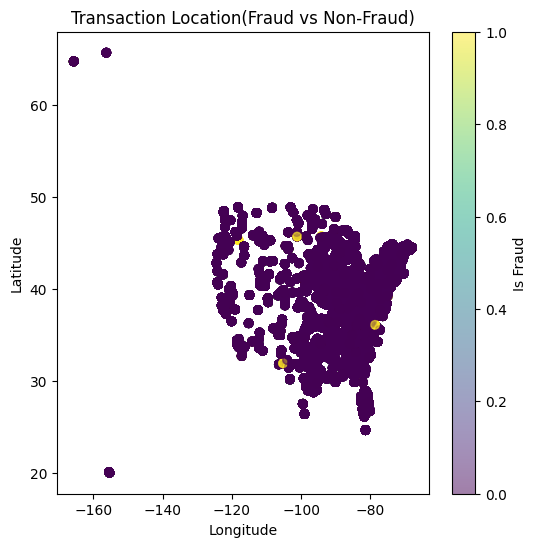

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df['long'],df['lat'],alpha=0.5,c=df['is_fraud'],cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Transaction Location(Fraud vs Non-Fraud)')
plt.colorbar(label='Is Fraud')
plt.show()

<ipython-input-10-8eab7b4c55df>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Blues')


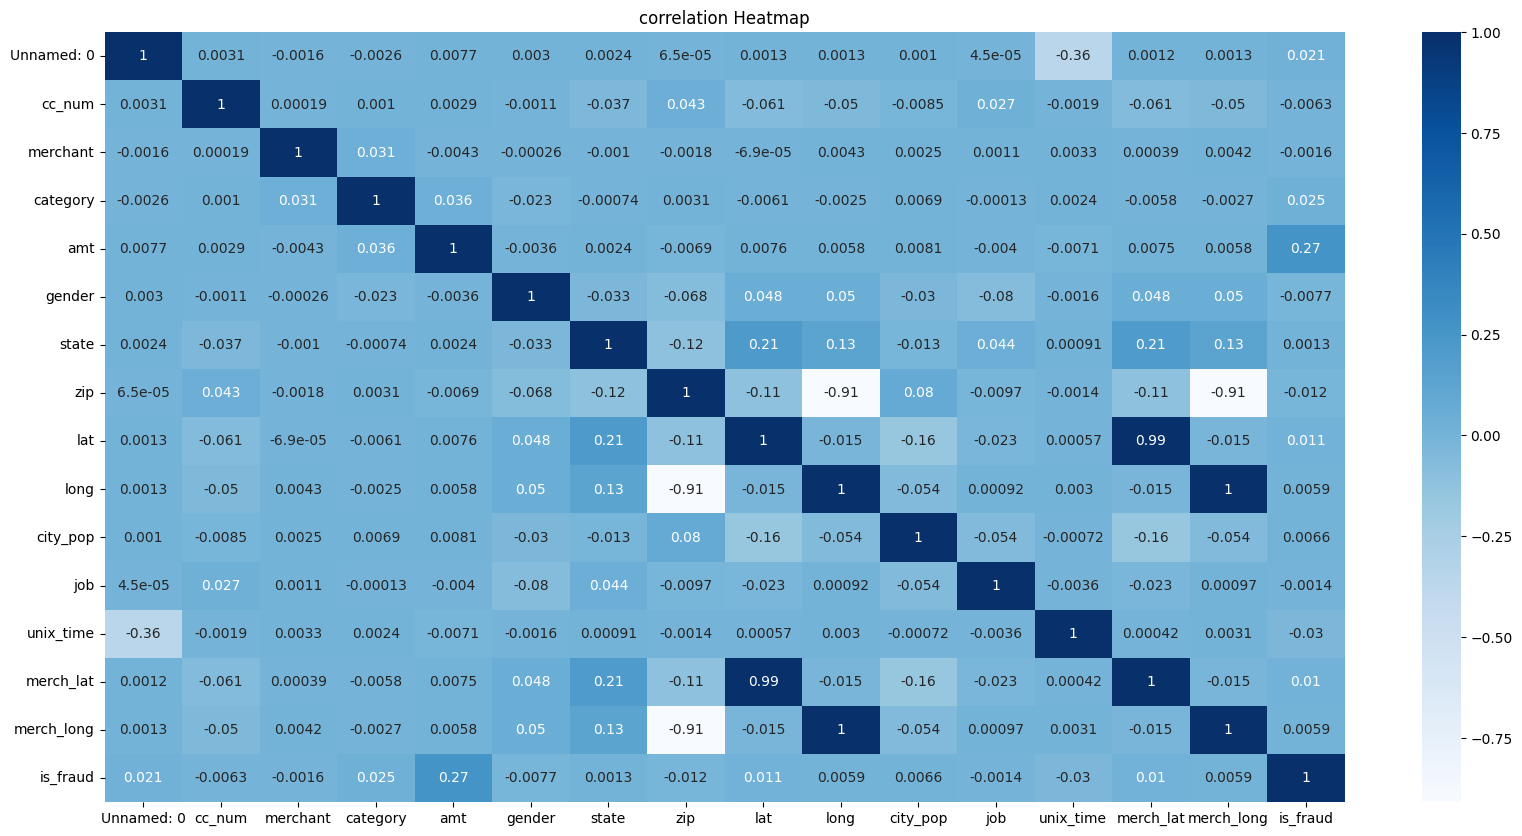

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.title('correlation Heatmap')
plt.show()